# Road Gradient Problem

In [ ]:
# The imports

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Given

In [ ]:
n = 100
e = np.array([5*np.sin(i*3*np.pi/100) + np.sin(i*10*np.pi/100) 
        for i in range(1, 101)])
d = 1

D1 = 0.08
D2 = 0.025
D3 = 0.005

## Explaination


### Variables

* $n$ : The total number of steps
* $e$ : `Vector(n)` The initial heights
* $h$ : `Vector(n)` The final heights
* $u$ : `Vector(n)` The difference in heights
* $\phi^{fill}$ : The cost of the filling when $h_i > e_i$
* $\phi^{cut}$ : The cost of the cutting when $h_i < e_i$



### Objective

The objective to be minimized <br>
$\phi$ = $\phi^{fill}$ + $\phi^{cut}$

$\phi^{fill}$ = $\sum_{i=1}^{n}$ $(2{u_i}_+^2 + 30{u_i}_+)$ <br>
$\phi^{cut}$ = $\sum_{i=1}^{n}$ $(12{u_i}_-^2 + {u_i}_-)$

### Constraints

* Max allowable slope <= `0.08`
* Max allowable curvatute <= `0.025`
* Max allowable third derivative <= `0.005`

Formulating the constraints, 
* $|\frac{h_{i+1} - h_i}{d}|$ $<=$ $0.08$ $∀$ $i$ &emsp; `OR` &emsp; $D^{(1)} <= 0.08$
* $|\frac{h_{i+2} - 2h_{i+1} + h_i}{d^2}|$ $<=$ $0.025$ $∀$ $i$ &emsp; `OR` &emsp; $D^{(2)} <= 0.025$
* $|\frac{h_{i+3} - 3h_{i+2} + 3h_{i+1} - h_i}{d^3}|$ $<=$ $0.005$ $∀$ $i$ &emsp; `OR` &emsp; $D^{(3)} <= 0.005$

### Formulation

The Convex Optimization Problem is to minimize our cost $\phi$ subject to the given constraints

## Implementation


In [ ]:
# Variables
h = cp.Variable(n)
u = h - e

u_p = cp.pos(u)
u_n = cp.neg(u)

# Objective
cost_fill = cp.sum(2 * cp.square(u_p) + 30 * u_p)
cost_cut = cp.sum(12 * cp.square(u_n) + u_n)
objective = cp.Minimize (cost_fill + cost_cut)

# Constraints
constraints = [
               cp.abs(cp.diff(h, 1)) <= D1,
               cp.abs(cp.diff(h, 2)) <= D2,
               cp.abs(cp.diff(h, 3)) <= D3
]

# Solving
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

print ("Minimum cost: ", result)

Minimum cost:  7562.815672259895


## Plotting

In [ ]:
x = [i for i in range(1, 101)]

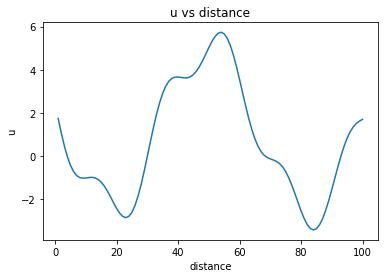

In [ ]:
# Plotting u
plt.plot(x, u.value)
plt.title("u vs distance")
plt.xlabel("distance")
plt.ylabel("u")
plt.show()

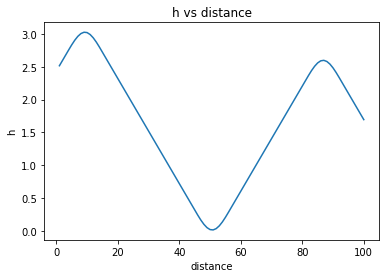

In [ ]:
# Plotting h
plt.plot(x, h.value)
plt.title("h vs distance")
plt.xlabel("distance")
plt.ylabel("h")
plt.show()

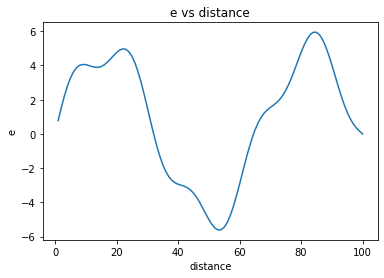

In [ ]:
# Plotting e
plt.plot(x, e)
plt.title("e vs distance")
plt.xlabel("distance")
plt.ylabel("e")
plt.show()

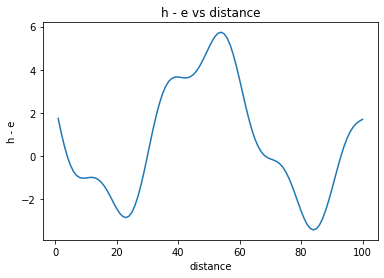

In [ ]:
# Plotting h - e
plt.plot(x, h.value - e)
plt.title("h - e vs distance")
plt.xlabel("distance")
plt.ylabel("h - e")
plt.show()

### Verifying the Convexity

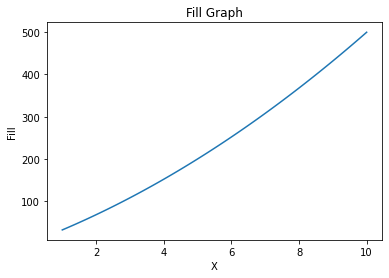


Here, u > 0 and hence, we define fill.
We plot fill(u) for u in the given range to verify the convexity.
We can observer full(u) --> inf AS u --> inf.



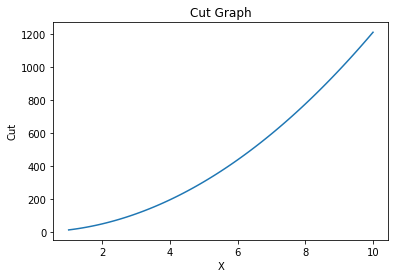


Here, -u > 0 and hence, we define cut.
We plot cut(max(-u, 0)) = cut(-u) for u in the given range to verify the convexity.
We can observer cut(-u) --> inf AS u --> inf.
We can say this since cut(u) = 0 for all u > 0.



In [ ]:
# Plotting fill and cut functions to verify 

def fill(u):
    return 2 * u**2 + 30 * u

def cut(u):
    return 12 * u**2 + u

# Fill
short_range = [i/10 for i in range(1*10, 10*10)] + [10]
plt.plot(short_range, list(map(fill, short_range)))
plt.title("Fill Graph")
plt.xlabel("X")
plt.ylabel("Fill")
plt.show()

print()
print("""Here, u > 0 and hence, we define fill.
We plot fill(u) for u in the given range to verify the convexity.
We can observer full(u) --> inf AS u --> inf.
""")

# Cut
short_range = [i/10 for i in range(1*10, 10*10)] + [10]
plt.plot(short_range, list(map(cut, short_range)))
plt.title("Cut Graph")
plt.xlabel("X")
plt.ylabel("Cut")
plt.show()

print()
print("""Here, -u > 0 and hence, we define cut.
We plot cut(max(-u, 0)) = cut(-u) for u in the given range to verify the convexity.
We can observer cut(-u) --> inf AS u --> inf.
We can say this since cut(u) = 0 for all u > 0.
""")